In [7]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def load_data():
  data = pd.read_csv('data.csv')
  return data

def normalization(data):
  data = (data - data.min())/ (data.max() - data.min())
  return data

def prepare_data():
  data = load_data()
  x = data.iloc[:, 0:-1].values
  y = data.iloc[:, -1].values
  x = normalization(x)
  one = np.ones((len(x),1))
  x = np.append(one, x, axis=1)
  y = np.array(y).reshape((len(y),1))
  x = np.array(x)
  y = np.array(y)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
  


  return x_train,y_train,x_test,y_test

def learn_model(x, y):

  return np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

def predict(x_test, theta):
  return np.dot(x_test,theta)

def mse(prediction, y_test):
  mse = np.square(np.subtract(y_test,prediction)).mean()
  return mse

def plot(x_test, y_test, theta):

      plt.scatter(x_test[:,1], y_test, color='blue')
      plt.plot(x_test[:,1], predict(x_test,theta), color='red')
      plt.show()

      return

x_train, y_train, x_test, y_test = prepare_data()
theta = learn_model(x_train, y_train)
print("theta_1: ", theta[1])
print("theta_0: ", theta[0])




theta_1:  [-49.74946507]
theta_0:  [79.67960882]


MSE Train:  16.08544287553335


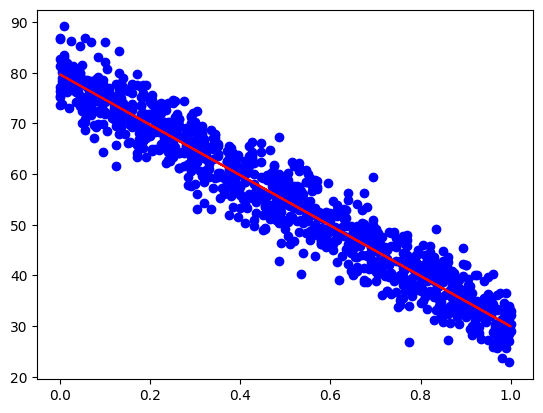

In [9]:
predicted_y_train = predict(x_train, theta)
print("MSE Train: " , mse(predicted_y_train, y_train))

plot(x_train,y_train, theta)

MSE Test:  16.19141864719671


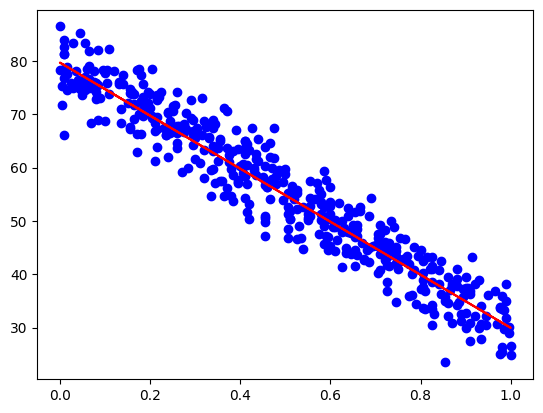

In [11]:
predicted_y_test = predict(x_test, theta)
print("MSE Test: " , mse(predicted_y_test, y_test))

plot(x_test,y_test, theta)

In [14]:
theta

array([[ 79.67960882],
       [-49.74946507]])

In [10]:
print("y = ", theta[1][0], "x +", theta[0][0])

y =  -0.7565597082838167 x + 0.8621755070748707
